In [685]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import seaborn as sns
import pandas as pd
from PIL import Image
from scipy import stats
import os
import math

## Import Player and Team Data

In [771]:
def import_player_data(leagueabbr, season):
    if leagueabbr != 'B5':
        df = pd.read_csv('CSV Data/{}{}_Outfield.csv'.format(leagueabbr,season))
    else:
        df = pd.read_csv('CSV Data/PL{}_Outfield.csv'.format(season))
        for league in ['LL','Bu','SA','L1']:
            tempdf = pd.read_csv('CSV Data/{}{}_Outfield.csv'.format(league,season))
            df = df.append(tempdf,ignore_index=True)
    return df

df = import_player_data('B5', 1920)
print(len(df.columns))
for i in df.columns:
    print(i)
df.loc[df['player'].str.contains('Gabr'),:]

152
Unnamed: 0
player
nationality
position
squad
age
birth_year
games
games_starts
minutes
goals
assists
pens_made
pens_att
cards_yellow
cards_red
goals_per90
assists_per90
goals_assists_per90
goals_pens_per90
goals_assists_pens_per90
xg
npxg
xa
xg_per90
xa_per90
xg_xa_per90
npxg_per90
npxg_xa_per90
minutes_90s
shots_total
shots_on_target
shots_free_kicks
shots_on_target_pct
shots_total_per90
shots_on_target_per90
goals_per_shot
goals_per_shot_on_target
npxg_per_shot
xg_net
npxg_net
passes_completed
passes
passes_pct
passes_total_distance
passes_progressive_distance
passes_completed_short
passes_short
passes_pct_short
passes_completed_medium
passes_medium
passes_pct_medium
passes_completed_long
passes_long
passes_pct_long
xa_net
assisted_shots
passes_into_final_third
passes_into_penalty_area
crosses_into_penalty_area
progressive_passes
passes_live
passes_dead
passes_free_kicks
through_balls
passes_pressure
passes_switches
crosses
corner_kicks
corner_kicks_in
corner_kicks_out
corner_kic

,Unnamed: 0,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
216,216,Gabriel Jesus,br BRA,FW,Manchester City,22,1997,34.0,21.0,2030.0,...,26.0,29.0,18.0,0.0,0.0,0.0,119.0,35.0,64.0,35.4
699,177,Gabriel Fernández,uy URU,"FW,MF",Celta Vigo,25,1994,20.0,5.0,561.0,...,17.0,8.0,7.0,0.0,0.0,0.0,23.0,26.0,26.0,50.0
915,393,Gabriel Paulista,br BRA,DF,Valencia,28,1990,33.0,31.0,2801.0,...,16.0,25.0,0.0,0.0,0.0,0.0,310.0,84.0,35.0,70.6
1438,346,Ronaël Pierre-Gabriel,fr FRA,DF,Mainz 05,21,1998,8.0,8.0,574.0,...,5.0,7.0,0.0,0.0,0.0,0.0,54.0,5.0,4.0,55.6
1714,124,Gabriele Corbo,it ITA,DF,Bologna,19,2000,2.0,1.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,50.0
1808,218,Gabriel,br BRA,GK,Lecce,26,1992,34.0,34.0,2997.0,...,1.0,5.0,0.0,0.0,1.0,1.0,159.0,0.0,0.0,0.0
1958,368,Gabriele Moncini,it ITA,"FW,MF",SPAL,23,1996,4.0,2.0,154.0,...,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0,62.5
2268,78,Gabriel Boschilia,br BRA,"MF,FW",Monaco,23,1996,5.0,1.0,130.0,...,1.0,3.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0
2366,176,Gabriel Dos Santos,br BRA,DF,Lille,21,1997,24.0,23.0,2087.0,...,18.0,26.0,0.0,0.0,0.0,1.0,254.0,88.0,36.0,71.0
2393,203,Ruben Gabrielsen,no NOR,DF,Toulouse,27,1992,8.0,8.0,656.0,...,5.0,5.0,0.0,0.0,0.0,0.0,53.0,22.0,12.0,64.7


In [687]:
def import_gk_data(leagueabbr, season):
    if leagueabbr != 'B5':
        df = pd.read_csv('CSV Data/{}{}_Keeper.csv'.format(leagueabbr,season))
    else:
        df = pd.read_csv('CSV Data/PL{}_Keeper.csv'.format(season))
        for league in ['LL','Bu','SA','L1']:
            tempdf = pd.read_csv('CSV Data/{}{}_Keeper.csv'.format(league,season))
            df = df.append(tempdf,ignore_index=True)
    return df

"""df = import_gk_data('PL', 1920)
[print(i) for i in df.columns];"""

"df = import_gk_data('PL', 1920)\n[print(i) for i in df.columns];"

In [688]:
def import_squad_data(leagueabbr, season):
    if leagueabbr != 'B5':
        df = pd.read_csv('CSV Data/{}{}_Squad.csv'.format(leagueabbr,season))
    else:
        df = pd.read_csv('CSV Data/PL{}_Squad.csv'.format(season))
        for league in ['LL','Bu','SA','L1']:
            tempdf = pd.read_csv('CSV Data/{}{}_Squad.csv'.format(league,season))
            df = df.append(tempdf,ignore_index=True)
    return df
squaddf = import_squad_data('B5',1920)
#squaddf.loc[squaddf['squad']=='Arsenal','possession'].tolist()[0]

## Create Overall DataFrame

In [752]:
def create_ovrdf(df,squaddf):
    df = df[['player','position','squad','age','minutes','dribble_tackles_pct','fouls','pressures','passes_completed_long','passes_into_final_third','clearances','aerials_won_pct','aerials_won','interceptions','tackles','passes_completed','passes','miscontrols','dispossessed','passes_pct','progressive_passes','carry_progressive_distance','xa_per90','dribbles_completed','fouled','pressure_regains','touches_att_pen_area','npxg_per90','npxg_per_shot','passes_into_penalty_area','shots_total','touches','shots_total_per90']]
    fivehundredmins_filter = df['minutes'] >= 500
    df = df.loc[fivehundredmins_filter,:]
    
    #we need to edit for per90
    for i, row in df.iterrows():
        df.at[i,'fouls'] = df.at[i,'fouls']/df.at[i,'minutes']*90
        df.at[i,'passes_completed_long'] = df.at[i,'passes_completed_long']/df.at[i,'minutes']*90
        df.at[i,'clearances'] = df.at[i,'clearances']/df.at[i,'minutes']*90
        df.at[i,'interceptions'] = df.at[i,'interceptions']/df.at[i,'minutes']*90
        df.at[i,'tackles'] = df.at[i,'tackles']/df.at[i,'minutes']*90
        df.at[i,'aerials_won'] = df.at[i,'aerials_won']/df.at[i,'minutes']*90
        df.at[i,'passes_into_final_third'] = df.at[i,'passes_into_final_third']/df.at[i,'minutes']*90
        df.at[i,'pressures'] = df.at[i,'pressures']/df.at[i,'minutes']*90
        df.at[i,'pressure_regains'] = df.at[i,'pressure_regains']/df.at[i,'minutes']*90
        df.at[i,'aerials_won'] = df.at[i,'aerials_won']/df.at[i,'minutes']*90
        df.at[i,'dribbles_completed'] = df.at[i,'dribbles_completed']/df.at[i,'minutes']*90
        df.at[i,'carry_progressive_distance'] = df.at[i,'carry_progressive_distance']/df.at[i,'minutes']*90
        df.at[i,'fouled'] = df.at[i,'fouled']/df.at[i,'minutes']*90
        df.at[i,'touches_att_pen_area'] = df.at[i,'touches_att_pen_area']/df.at[i,'minutes']*90
        df.at[i,'fouled'] = df.at[i,'fouled']/df.at[i,'minutes']*90
        df.at[i,'passes_into_penalty_area'] = df.at[i,'passes_into_penalty_area']/df.at[i,'minutes']*90
        df.at[i,'shots_total'] = df.at[i,'shots_total']/df.at[i,'minutes']*90

        #progressive pass percentage:
        df.at[i,'progressive_passes'] = df.at[i,'progressive_passes']/df.at[i,'minutes']*90
        df.at[i,'progressive_passes'] = df.at[i,'progressive_passes']/df.at[i,'passes']*100

        #shot touch%
        df.at[i,'shot_touch_perc'] = df.at[i,'shots_total']/df.at[i,'touches']*100

        #turnovers:

        df.at[i,'passes'] = df.at[i,'passes']/df.at[i,'minutes']*90
        df.at[i,'passes_completed'] = df.at[i,'passes_completed']/df.at[i,'minutes']*90
        df.at[i,'miscontrols'] = df.at[i,'miscontrols']/df.at[i,'minutes']*90
        df.at[i,'dispossessed'] = df.at[i,'dispossessed']/df.at[i,'minutes']*90

        df.at[i,'turnovers'] = df.at[i,'passes']-df.at[i,'passes_completed']+df.at[i,'miscontrols']+df.at[i,'dispossessed']

    #possesion adjusted stats
    for index, row in df.iterrows():
        df.at[index,'tackles'] = df.at[index,'tackles'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==df.at[index,'squad'],'possession'].tolist()[0]-50)))
        df.at[index,'interceptions'] = df.at[index,'interceptions'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==df.at[index,'squad'],'possession'].tolist()[0]-50)))
        
    df = df.rename(columns={'passes_completed_long' : 'passes_completed_long_per90',
                               'pressures': 'pressures_per90',
                               'clearances': 'clearances_per90',
                                'interceptions': 'interceptions_per90',
                                'tackles': 'tackles_per90',
                                'fouls': 'fouls_per90',
                                'aerials_won': 'aerials_won_per90',
                                'passes_into_final_third' : 'passes_into_final_third_per90',
                                'pressure_regains': 'pressure_regains_per90',
                                'dribbles_completed': 'dribbles_completed_per90',
                                'progressive_passes': 'progressive_pass_percentage',
                                'carry_progressive_distance' : 'carry_progressive_distance_per90',
                                'fouled': 'fouled_per90',
                                'touches_att_pen_area': 'touches_att_pen_area_per90',
                                'turnovers': 'turnovers_per90',
                                'passes_into_penalty_area': 'passes_into_penalty_area_per90',
                               })
    
    df['index'] = list(range(len(df.index)))
    df = df.set_index('index')
    
    return df

create_ovrdf(import_player_data('PL',1920),import_squad_data('PL',1920))
        

,player,position,squad,age,minutes,dribble_tackles_pct,fouls_per90,pressures_per90,passes_completed_long_per90,passes_into_final_third_per90,...,pressure_regains_per90,touches_att_pen_area_per90,npxg_per90,npxg_per_shot,passes_into_penalty_area_per90,shots_total,touches,shots_total_per90,shot_touch_perc,turnovers_per90
index,,,,,,,,,,,,,,,,,,,,,
0,Patrick van Aanholt,DF,Crystal Palace,28,2507.0,40.7,0.323095,9.585162,6.928600,3.051456,...,2.656562,1.830874,0.06,0.06,0.897487,0.933387,1839.0,0.93,0.050755,13.211009
1,Max Aarons,DF,Norwich City,19,3240.0,46.7,0.805556,13.472222,4.138889,1.222222,...,3.666667,1.444444,0.01,0.03,0.888889,0.388889,2133.0,0.39,0.018232,12.638889
2,Tammy Abraham,FW,Chelsea,21,2215.0,25.0,0.690745,17.471783,1.584650,0.650113,...,5.282167,6.704289,0.59,0.17,0.203160,3.575621,739.0,3.58,0.483846,9.832957
3,Che Adams,FW,Southampton,23,1111.0,0.0,1.377138,18.712871,1.944194,0.972097,...,4.698470,5.508551,0.34,0.11,0.243024,2.997300,441.0,3.00,0.679660,12.475248
4,Adrián,GK,Liverpool,32,875.0,0.0,0.000000,0.205714,12.137143,0.308571,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,338.0,0.00,0.000000,8.948571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Pablo Zabaleta,DF,West Ham,34,592.0,26.7,1.064189,14.138514,5.320946,4.256757,...,4.104730,1.216216,0.01,0.04,0.912162,0.152027,398.0,0.15,0.038198,12.618243
390,Wilfried Zaha,"MF,FW",Crystal Palace,26,3280.0,22.2,1.317073,22.307927,3.814024,1.646341,...,6.503049,6.201220,0.14,0.09,2.057927,1.673780,1859.0,1.67,0.090037,15.036585
391,Christoph Zimmermann,DF,Norwich City,26,1430.0,64.0,0.566434,7.741259,11.013986,1.447552,...,2.391608,0.440559,0.02,0.06,0.062937,0.377622,826.0,0.38,0.045717,7.930070


In [754]:
def create_ovr_graphdf(df):
    graphdf = df[['dribble_tackles_pct','fouls_per90','pressures_per90','passes_completed_long_per90','passes_into_final_third_per90','clearances_per90','aerials_won_pct','aerials_won_per90','interceptions_per90','tackles_per90','passes_pct','progressive_pass_percentage','carry_progressive_distance_per90','xa_per90','dribbles_completed_per90','fouled_per90','pressure_regains_per90','touches_att_pen_area_per90','npxg_per90','npxg_per_shot','passes_into_penalty_area_per90','shots_total_per90','shot_touch_perc','turnovers_per90']]
    return graphdf

create_ovr_graphdf(create_ovrdf(import_player_data('PL',1920),import_squad_data('PL',1920)))

,dribble_tackles_pct,fouls_per90,pressures_per90,passes_completed_long_per90,passes_into_final_third_per90,clearances_per90,aerials_won_pct,aerials_won_per90,interceptions_per90,tackles_per90,...,dribbles_completed_per90,fouled_per90,pressure_regains_per90,touches_att_pen_area_per90,npxg_per90,npxg_per_shot,passes_into_penalty_area_per90,shots_total_per90,shot_touch_perc,turnovers_per90
index,,,,,,,,,,,,,,,,,,,,,
0,40.7,0.323095,9.585162,6.928600,3.051456,2.405265,41.4,0.015465,1.208360,1.339703,...,0.646191,0.010310,2.656562,1.830874,0.06,0.06,0.897487,0.93,0.050755,13.211009
1,46.7,0.805556,13.472222,4.138889,1.222222,2.388889,35.4,0.017747,0.938208,1.715581,...,1.361111,0.037809,3.666667,1.444444,0.01,0.03,0.888889,0.39,0.018232,12.638889
2,25.0,0.690745,17.471783,1.584650,0.650113,1.056433,37.6,0.110615,0.302545,0.847126,...,0.853273,0.039623,5.282167,6.704289,0.59,0.17,0.203160,3.58,0.483846,9.832957
3,0.0,1.377138,18.712871,1.944194,0.972097,0.810081,25.2,0.190307,0.156348,0.625392,...,1.215122,0.104997,4.698470,5.508551,0.34,0.11,0.243024,3.00,0.679660,12.475248
4,0.0,0.000000,0.205714,12.137143,0.308571,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.010580,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,8.948571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,26.7,1.064189,14.138514,5.320946,4.256757,3.040541,47.1,0.184898,1.400615,1.616095,...,0.000000,0.208010,4.104730,1.216216,0.01,0.04,0.912162,0.15,0.038198,12.618243
390,22.2,1.317073,22.307927,3.814024,1.646341,0.109756,29.6,0.012046,0.321247,0.903507,...,4.445122,0.089595,6.503049,6.201220,0.14,0.09,2.057927,1.67,0.090037,15.036585
391,64.0,0.566434,7.741259,11.013986,1.447552,7.741259,76.5,0.154482,1.093233,1.882790,...,0.251748,0.035650,2.391608,0.440559,0.02,0.06,0.062937,0.38,0.045717,7.930070


## Create GK DataFrame

In [689]:
def create_gkdf(df,squaddf):
    gkdf = df[['player','position','squad','age','minutes_gk','save_pct','psxg_net_per90_gk','passes_pct_launched_gk','pct_passes_launched_gk','crosses_stopped_pct_gk','def_actions_outside_pen_area_per90_gk','avg_distance_def_actions_gk','turnovers','']]

    #possesion adjusted stats
    #for index, row in gkdf.iterrows():
    #    gkdf.at[index,'def_actions_outside_pen_area_per90_gk'] = gkdf.at[index,'def_actions_outside_pen_area_per90_gk'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==gkdf.at[index,'squad'],'possession'].tolist()[0]-50)))
    
    gkdf['save_pct'] = gkdf[['save_pct']]*100
    
    gkdf = gkdf.rename(columns={'minutes_gk' : 'minutes',})
    
    return gkdf


#create_gkdf(import_gk_data('PL',1920),import_squad_data('PL',1920))


In [690]:
def create_gk_graphdf(gkdf):
    graphdf = gkdf[['save_pct','psxg_net_per90_gk','passes_pct_launched_gk','pct_passes_launched_gk','crosses_stopped_pct_gk','def_actions_outside_pen_area_per90_gk','avg_distance_def_actions_gk']]

    return graphdf

## Create CB DataFrame

In [691]:
def create_cbdf(df,squaddf):
    
    cbdf = df[['player','position','squad','age','minutes','dribble_tackles_pct','fouls','pressures','passes_pct','passes_completed_long','clearances','aerials_won_pct','aerials_won','interceptions','tackles','passes_completed','passes','miscontrols','dispossessed','passes_into_final_third','pressures','pressure_regains','interceptions','tackles','dribble_tackles_pct','fouls','aerials_won','passes_completed','passes','miscontrols','dispossessed','dribbles_completed','npxg_xa_per90','passes_pct']]
    cb_filter = cbdf['position'].str.contains('DF')
    fivehundredmins_filter = cbdf['minutes'] >= 500
    cbdf = cbdf.loc[cb_filter & fivehundredmins_filter,:]

    #we need to edit for per90

    cbdf['fouls'] = cbdf['fouls'].divide(cbdf.minutes)*90
    cbdf['pressures'] = cbdf['pressures'].divide(cbdf.minutes)*90    
    cbdf['passes_completed_long'] = cbdf['passes_completed_long'].divide(cbdf.minutes)*90
    cbdf['clearances'] = cbdf['clearances'].divide(cbdf.minutes)*90
    cbdf['interceptions'] = cbdf['interceptions'].divide(cbdf.minutes)*90
    cbdf['tackles'] = cbdf['tackles'].divide(cbdf.minutes)*90
    cbdf['aerials_won'] = cbdf['aerials_won'].divide(cbdf.minutes)*90

    #turnovers:
    
    cbdf['passes'] = cbdf['passes'].divide(cbdf.minutes)*90
    cbdf['passes_completed'] = cbdf['passes_completed'].divide(cbdf.minutes)*90
    cbdf['miscontrols'] = cbdf['miscontrols'].divide(cbdf.minutes)*90
    cbdf['dispossessed'] = cbdf['dispossessed'].divide(cbdf.minutes)*90

    cbdf['turnovers'] = cbdf['passes']-cbdf['passes_completed']+cbdf['miscontrols']+cbdf['dispossessed']
    
    
    #possesion adjusted stats
    for index, row in cbdf.iterrows():
        cbdf.at[index,'tackles'] = cbdf.at[index,'tackles'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==cbdf.at[index,'squad'],'possession'].tolist()[0]-50)))
        cbdf.at[index,'interceptions'] = cbdf.at[index,'interceptions'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==cbdf.at[index,'squad'],'possession'].tolist()[0]-50)))
        
    cbdf = cbdf.rename(columns={'passes_completed_long' : 'passes_completed_long_per90',
                               'pressures': 'pressures_per90',
                               'clearances': 'clearances_per90',
                                'interceptions': 'interceptions_per90',
                                'tackles': 'tackles_per90',
                                'fouls': 'fouls_per90',
                                'aerials_won': 'aerials_won_per90',
                                'turnovers': 'turnovers_per90'
                               })

    cbdf['index'] = list(range(len(cbdf.index)))
    cbdf = cbdf.set_index('index')
    
    return cbdf

"""df = import_player_data('PL', 1920)
squaddf = import_squad_data('PL',1920)

create_cbdf(df,squaddf)"""

"df = import_player_data('PL', 1920)\nsquaddf = import_squad_data('PL',1920)\n\ncreate_cbdf(df,squaddf)"

In [692]:
def create_cb_graphdf(cbdf):
    graphdf = cbdf[['dribble_tackles_pct','fouls_per90','pressures_per90','passes_pct','passes_completed_long_per90','turnovers_per90','clearances_per90','aerials_won_pct','aerials_won_per90','interceptions_per90','tackles_per90']]
    return graphdf

## Create Full-Back DataFrame

In [693]:
def create_fbdf(df,squaddf):

    fbdf = df[['player','position','squad','age','minutes','passes_into_final_third','pressures','pressure_regains','interceptions','tackles','dribble_tackles_pct','fouls','aerials_won','passes_completed','passes','miscontrols','dispossessed','dribbles_completed','npxg_xa_per90','passes_pct']]
    fb_filter = fbdf['position'].str.contains('DF')
    fivehundredmins_filter = fbdf['minutes'] >= 500
    fbdf = fbdf.loc[fb_filter & fivehundredmins_filter,:]

    #we need to edit for per90
    
    fbdf['passes_into_final_third'] = fbdf['passes_into_final_third'].divide(fbdf.minutes)*90
    fbdf['pressures'] = fbdf['pressures'].divide(fbdf.minutes)*90
    fbdf['pressure_regains'] = fbdf['pressure_regains'].divide(fbdf.minutes)*90
    fbdf['interceptions'] = fbdf['interceptions'].divide(fbdf.minutes)*90
    fbdf['tackles'] = fbdf['tackles'].divide(fbdf.minutes)*90
    fbdf['fouls'] = fbdf['fouls'].divide(fbdf.minutes)*90
    fbdf['aerials_won'] = fbdf['aerials_won'].divide(fbdf.minutes)*90
    fbdf['dribbles_completed'] = fbdf['dribbles_completed'].divide(fbdf.minutes)*90

    #turnovers:
    
    fbdf['passes'] = fbdf['passes'].divide(fbdf.minutes)*90
    fbdf['passes_completed'] = fbdf['passes_completed'].divide(fbdf.minutes)*90
    fbdf['miscontrols'] = fbdf['miscontrols'].divide(fbdf.minutes)*90
    fbdf['dispossessed'] = fbdf['dispossessed'].divide(fbdf.minutes)*90

    fbdf['turnovers'] = fbdf['passes']-fbdf['passes_completed']+fbdf['miscontrols']+fbdf['dispossessed']
    
    #possesion adjusted stats
    for index, row in fbdf.iterrows():
        fbdf.at[index,'tackles'] = fbdf.at[index,'tackles'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==fbdf.at[index,'squad'],'possession'].tolist()[0]-50)))
        fbdf.at[index,'interceptions'] = fbdf.at[index,'interceptions'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==fbdf.at[index,'squad'],'possession'].tolist()[0]-50)))
 
    fbdf = fbdf.rename(columns={'passes_into_final_third' : 'passes_into_final_third_per90',
                               'pressures': 'pressures_per90',
                               'pressure_regains': 'pressure_regains_per90',
                                'interceptions': 'interceptions_per90',
                                'tackles': 'tackles_per90',
                                'fouls': 'fouls_per90',
                                'aerials_won': 'aerials_won_per90',
                                'dribbles_completed': 'dribbles_completed_per90',
                                'turnovers': 'turnovers_per90'
                               })

    fbdf['index'] = list(range(len(fbdf.index)))
    fbdf = fbdf.set_index('index')
    
    return fbdf


In [694]:
def create_fb_graphdf(fbdf):
    graphdf = fbdf[['passes_into_final_third_per90','pressures_per90','pressure_regains_per90','interceptions_per90','tackles_per90','dribble_tackles_pct','fouls_per90','aerials_won_per90','turnovers_per90','dribbles_completed_per90','npxg_xa_per90','passes_pct']]
    return graphdf


## Create Midfielder DataFrame

In [735]:
def create_mfdf(df,squaddf):

    mfdf = df[['player','position','squad','age','minutes','passes_pct','progressive_passes','carry_progressive_distance','npxg_per90','xa_per90','dribbles_completed','fouled','passes_completed','passes','miscontrols','dispossessed','pressure_regains','pressures','tackles','interceptions']]
    mf_filter = mfdf['position'].str.contains('MF')
    fivehundredmins_filter = mfdf['minutes'] >= 500
    mfdf = mfdf.loc[mf_filter & fivehundredmins_filter,:]
    
    #we need to edit for per90

    mfdf['carry_progressive_distance'] = mfdf['carry_progressive_distance'].divide(mfdf.minutes)*90
    mfdf['dribbles_completed'] = mfdf['dribbles_completed'].divide(mfdf.minutes)*90
    mfdf['fouled'] = mfdf['fouled'].divide(mfdf.minutes)*90
    mfdf['pressure_regains'] = mfdf['pressure_regains'].divide(mfdf.minutes)*90
    mfdf['pressures'] = mfdf['pressures'].divide(mfdf.minutes)*90
    
    #turnovers:
    mfdf['passes'] = mfdf['passes'].divide(mfdf.minutes)*90
    mfdf['passes_completed'] = mfdf['passes_completed'].divide(mfdf.minutes)*90
    mfdf['miscontrols'] = mfdf['miscontrols'].divide(mfdf.minutes)*90
    mfdf['dispossessed'] = mfdf['dispossessed'].divide(mfdf.minutes)*90

    mfdf['turnovers'] = mfdf['passes']-mfdf['passes_completed']+mfdf['miscontrols']+mfdf['dispossessed']

    

    #progressive pass percentage:
    mfdf['progressive_passes'] = mfdf['progressive_passes'].divide(mfdf.minutes)*90
    mfdf['progressive_passes'] = mfdf['progressive_passes'].divide(mfdf.passes)*100

    #need to adjust for possession:
    mfdf['tackles'] = mfdf['tackles'].divide(mfdf.minutes)*90
    mfdf['interceptions'] = mfdf['interceptions'].divide(mfdf.minutes)*90

    #possesion adjusted stats
    for index, row in mfdf.iterrows():
        mfdf.at[index,'tackles'] = mfdf.at[index,'tackles'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==mfdf.at[index,'squad'],'possession'].tolist()[0]-50)))
        mfdf.at[index,'interceptions'] = mfdf.at[index,'interceptions'] * 2/(1 + math.exp(-0.1*(squaddf.loc[squaddf['squad']==mfdf.at[index,'squad'],'possession'].tolist()[0]-50)))
 

    mfdf = mfdf.rename(columns={'progressive_passes': 'progressive_pass_percentage',
                                'carry_progressive_distance' : 'carry_progressive_distance_per90',
                               'dribbles_completed': 'dribbles_completed_per90',
                               'fouled': 'fouled_per90',
                                'turnovers': 'turnovers_per90',
                                'pressure_regains': 'pressure_regains_per90',
                                'pressures': 'pressures_per90',
                                'tackles': 'tackles_per90',
                                'interceptions': 'interceptions_per90'
                               })

    mfdf['index'] = list(range(len(mfdf.index)))
    mfdf = mfdf.set_index('index')
    return mfdf

In [696]:
def create_mf_graphdf(mfdf):
    graphdf = mfdf[['passes_pct','progressive_pass_percentage','carry_progressive_distance_per90','npxg_per90','xa_per90','dribbles_completed_per90','fouled_per90','pressure_regains_per90','pressures_per90','tackles_per90','interceptions_per90','turnovers_per90']]
    return graphdf

## Create Winger DataFrame

In [697]:
def create_wfdf(df):

    wfdf = df[['player','position','squad','age','minutes','passes_pct','touches_att_pen_area','shots_total_per90','npxg_per90','npxg_per_shot','pressure_regains','passes_completed','passes','miscontrols','dispossessed','dribbles_completed','fouled','xa_per90','passes_into_penalty_area']]
    wf_filter = wfdf['position'].str.contains('MF|FW')
    fivehundredmins_filter = wfdf['minutes'] >= 500
    wfdf = wfdf.loc[wf_filter & fivehundredmins_filter,:]

    #we need to edit for per90

    wfdf['touches_att_pen_area'] = wfdf['touches_att_pen_area'].divide(wfdf.minutes)*90
    wfdf['pressure_regains'] = wfdf['pressure_regains'].divide(wfdf.minutes)*90
    wfdf['dribbles_completed'] = wfdf['dribbles_completed'].divide(wfdf.minutes)*90
    wfdf['fouled'] = wfdf['fouled'].divide(wfdf.minutes)*90
    wfdf['passes_into_penalty_area'] = wfdf['passes_into_penalty_area'].divide(wfdf.minutes)*90

    #turnovers:
    wfdf['passes'] = wfdf['passes'].divide(wfdf.minutes)*90
    wfdf['passes_completed'] = wfdf['passes_completed'].divide(wfdf.minutes)*90
    wfdf['miscontrols'] = wfdf['miscontrols'].divide(wfdf.minutes)*90
    wfdf['dispossessed'] = wfdf['dispossessed'].divide(wfdf.minutes)*90

    wfdf['turnovers'] = wfdf['passes']-wfdf['passes_completed']+wfdf['miscontrols']+wfdf['dispossessed']

    wfdf = wfdf.rename(columns={'touches_att_pen_area': 'touches_att_pen_area_per90',
                                'pressure_regains' : 'pressure_regains_per90',
                               'dribbles_completed': 'dribbles_completed_per90',
                               'fouled': 'fouled_per90',
                                'turnovers': 'turnovers_per90',
                                'passes_into_penalty_area': 'passes_into_penalty_area_per90',
                               })

    wfdf['index'] = list(range(len(wfdf.index)))
    wfdf = wfdf.set_index('index')
    
    return wfdf

In [698]:
def create_wf_graphdf(wfdf):
    graphdf = wfdf[['passes_pct','touches_att_pen_area_per90','shots_total_per90','npxg_per90','npxg_per_shot','pressure_regains_per90','turnovers_per90','dribbles_completed_per90','fouled_per90','xa_per90','passes_into_penalty_area_per90']]
    return graphdf

## Create Striker DataFrame

In [699]:
def create_stdf(df):

    stdf = df[['player','position','squad','age','minutes','shots_total','touches','touches_att_pen_area','shots_total_per90','npxg_per90','npxg_per_shot','dribbles_completed','passes_completed','passes','miscontrols','dispossessed','aerials_won','pressures','pressure_regains','xa_per90']]
    st_filter = stdf['position']==('FW')
    fivehundredmins_filter = stdf['minutes'] >= 500
    stdf = stdf.loc[st_filter & fivehundredmins_filter,:]

    #shot touch%
    stdf['shot_touch_perc'] = stdf['shots_total'].divide(stdf.touches)*100

    #we need to edit for per90
    
    stdf['shots_total'] = stdf['shots_total'].divide(stdf.minutes)*90
    stdf['touches_att_pen_area'] = stdf['touches_att_pen_area'].divide(stdf.minutes)*90
    stdf['dribbles_completed'] = stdf['dribbles_completed'].divide(stdf.minutes)*90
    stdf['aerials_won'] = stdf['aerials_won'].divide(stdf.minutes)*90
    stdf['pressures'] = stdf['pressures'].divide(stdf.minutes)*90
    stdf['pressure_regains'] = stdf['pressure_regains'].divide(stdf.minutes)*90

    #turnovers:
    stdf['passes'] = stdf['passes'].divide(stdf.minutes)*90
    stdf['passes_completed'] = stdf['passes_completed'].divide(stdf.minutes)*90
    stdf['miscontrols'] = stdf['miscontrols'].divide(stdf.minutes)*90
    stdf['dispossessed'] = stdf['dispossessed'].divide(stdf.minutes)*90

    stdf['turnovers'] = stdf['passes']-stdf['passes_completed']+stdf['miscontrols']+stdf['dispossessed']

    stdf = stdf.rename(columns={'pressure_regains' : 'pressure_regains_per90',
                               'dribbles_completed': 'dribbles_completed_per90',
                               'touches_att_pen_area': 'touches_att_pen_area_per90',
                                'turnovers': 'turnovers_per90',
                                'pressures': 'pressures_per90',
                                'aerials_won': 'aerials_won_per90'
                               })

    stdf['index'] = list(range(len(stdf.index)))
    stdf = stdf.set_index('index')
    
    return stdf

In [700]:
def create_st_graphdf(stdf):
    graphdf = stdf[['shot_touch_perc','touches_att_pen_area_per90','shots_total_per90','npxg_per90','npxg_per_shot','dribbles_completed_per90','turnovers_per90','aerials_won_per90','pressures_per90','pressure_regains_per90','xa_per90']]
    return graphdf


#### Get Player Details

In [701]:
def get_player_info(posdf):
    info = posdf[['player','squad','minutes','age']]
    return info

## Start the Graphing

In [702]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

In [703]:
def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    """for d, (y1, y2) in zip(data[1:], ranges[1:]):
        print(d)
        print(y1,y2)
        if d < y1:
            d=y1
        elif d>y2:
            d=y2
        #assert (y1 <= d <= y2) or (y2 <= d <= y1)"""
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        if d < y1:
            d=y1
        elif d>y2:
            d=y2
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    
    return sdata

In [704]:
def _calculate_ranges(variables,graphdf):
    rangelist = []
    for var in variables:
        mean = float(graphdf[['{}'.format(var)]].mean())
        std = float(graphdf[['{}'.format(var)]].std())
        
        bot = mean - 2 * std
        if (bot < 0) & (var != 'psxg_net_per90_gk'):
            bot=0
        top = mean + 2* std
        if (top > 100) & (var == 'passes_pct'):
            top = 100
        if var in ['turnovers_per90','fouls_per90','pct_passes_launched_gk']:
            temp = bot
            bot = top
            top = temp
            #print(bot,top)
        rangelist.append((bot,top))
    return rangelist

In [705]:
def determine_color(player_info, leagueabbr):
    if leagueabbr == "PL":
        red_teams = ['Liverpool','Manchester Utd','Sheffield Utd','Arsenal','Southampton','Bournemouth']
        blue_teams = ['Chelsea','Leicester City','Everton','Crystal Palace']
        sky_blue_teams = ['Manchester City', 'Brighton']
        orange_teams = ['Wolves']
        claret_teams = ['West Ham', 'Burnley', 'Aston Villa']
        navy_teams = ['Tottenham']
        bw_teams = ['Newcastle Utd']
        yellow_teams = ['Watford', 'Norwich City']
    elif leagueabbr == "LL":
        red_teams = ['Atlético Madrid', 'Sevilla', 'Granada','Osasuna', 'Athletic Club', 'Mallorca', 'Espanyol']
        blue_teams = ['Real Sociedad', 'Getafe', 'Levante', 'Eibar', 'Leganes']
        sky_blue_teams = ['Deportivo Alavés', 'Celta Vigo']
        orange_teams = ['Valencia']
        claret_teams = []
        navy_teams = ['Real Madrid','Barcelona']
        purple_teams = ['Valladolid']
        yellow_teams = ['Villarreal']
        green_teams = ['Real Betis']
        bw_teams = []
    elif leagueabbr == "L1":
        red_teams = ['Rennes','Lille','Nice','Reims','Monaco','Nîmes','Brest','Dijon']
        blue_teams = ['Strasbourg']
        sky_blue_teams = ['Marseille']
        orange_teams = []
        claret_teams = ['Metz']
        navy_teams = ['Paris S-G','Lyon','Montpellier','Bordeaux']
        bw_teams = ['Amiens','Angers']
        yellow_teams = ['Nantes']
        green_teams = ['Saint-Étienne']
        purple_teams = ['Toulouse']
    elif leagueabbr == "SA":
        red_teams = ['Milan','Bologna','Cagliari','Genoa','Lecce']
        blue_teams = ['Atalanta','Napoli','Sampdoria','Brescia','SPAL']
        sky_blue_teams = ['Lazio']
        orange_teams = []
        claret_teams = ['Roma','Torino']
        navy_teams = ['Inter','Hellas Verona']
        purple_teams = ['Fiorentina']
        yellow_teams = ['Parma']
        green_teams = ['Sassuolo']
        bw_teams = ['Juventus','Udinese']
    elif leagueabbr == "Bu":
        red_teams = ['Bayern Munich','RB Leipzig','Leverkusen','Eint Frankfurt','Union Berlin','Mainz 05','Köln','Düsseldorf']
        blue_teams = ['Hoffenheim','Hertha BSC','Schalke 04','Paderborn 07']
        sky_blue_teams = []
        orange_teams = []
        claret_teams = []
        navy_teams = []
        purple_teams = []
        yellow_teams = ['Dortmund']
        green_teams = ['Wolfsburg','Augsburg','Werder Bremen']
        bw_teams = ["M'gladbach",'Freiburg']
    elif leagueabbr == 'B5':
        red_teams = ['Liverpool','Manchester Utd','Sheffield Utd','Arsenal','Southampton','Bournemouth','Atlético Madrid', 'Sevilla', 'Granada','Osasuna', 'Athletic Club', 'Mallorca', 'Espanyol','Rennes','Lille','Nice','Reims','Monaco','Nîmes','Brest','Dijon','Milan','Bologna','Cagliari','Genoa','Lecce','Bayern Munich','RB Leipzig','Leverkusen','Eint Frankfurt','Union Berlin','Mainz 05','Köln','Düsseldorf']
        blue_teams = ['Chelsea','Leicester City','Everton','Crystal Palace','Real Sociedad', 'Getafe', 'Levante', 'Eibar', 'Leganes','Strasbourg','Atalanta','Napoli','Sampdoria','Brescia','SPAL','Hoffenheim','Hertha BSC','Schalke 04','Paderborn 07']
        sky_blue_teams = ['Manchester City', 'Brighton','Deportivo Alavés', 'Celta Vigo','Marseille','Lazio']
        orange_teams = ['Wolves','Valencia']
        claret_teams = ['West Ham', 'Burnley', 'Aston Villa','Metz','Roma','Torino']
        navy_teams = ['Tottenham','Real Madrid','Barcelona','Paris S-G','Lyon','Montpellier','Bordeaux','Inter','Hellas Verona']
        bw_teams = ['Newcastle Utd','Amiens','Angers','Juventus','Udinese',"M'gladbach",'Freiburg']
        yellow_teams = ['Watford', 'Norwich City','Villarreal','Nantes','Parma','Dortmund']
        purple_teams = ['Valladolid','Toulouse','Fiorentina']
        green_teams = ['Real Betis','Saint-Étienne','Sassuolo','Wolfsburg','Augsburg','Werder Bremen']
        
    if player_info['squad'] in red_teams:
        color = 'tab:red'
    elif player_info['squad'] in blue_teams:
        color = 'tab:blue'
    elif player_info['squad'] in sky_blue_teams:
        color = 'lightskyblue'
    elif player_info['squad'] in orange_teams:
        color = 'tab:orange'
    elif player_info['squad'] in claret_teams:
        color = 'maroon'
    elif player_info['squad'] in navy_teams:
        color = 'navy'
    elif player_info['squad'] in bw_teams:
        color = 'k'
    elif player_info['squad'] in yellow_teams:
        color = 'gold'
    elif player_info['squad'] in purple_teams:
        color = 'indigo'
    elif player_info['squad'] in green_teams:
        color = 'tab:green'
            
    return color

In [759]:
class PlayerRadar():
    def __init__(self, fig, player, variables, ranges, player_info, position, data, leagueabbr, n_ordinate_levels=8):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,label = "axes{}".format(i)) for i in range(len(variables))]

        l, text = axes[0].set_thetagrids(angles, labels=variables, weight=600)

        [txt.set_rotation(angle-90) for txt, angle in zip(text, angles)]
        axes[0].set_axisbelow(True)
        #axes[0].set_zorder(5)
        for ax in axes[1:]:
            #[line.set_zorder(3) for line in ax.lines]
            #ax.set_axisbelow(True)
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            #gridlabel = ["{}".format(round(x,2)) for x in grid]
          
            #formatting gridlabels:
            gridlabel = []
            if position == 'Goalkeeper':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Center Back':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Full Back':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}\n".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 11:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Midfielder':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["  {}".format(int(x)) for x in grid]
                elif i == 3:
                    gridlabel = [" {}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}\n".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 11:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
            elif position == 'AMF/Winger':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 10:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
            elif position == 'Striker':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = [" {}".format(round(x,2)) for x in grid]
                
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel, angle=angles[i], fontsize=8,weight='bold',fontstretch=1000,zorder=1)
            #ax.set_yticklabels(gridlabel,zorder=2)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])

        
        color = determine_color(player_info, leagueabbr)
            
            
        ax.annotate('{}'.format(player_info['squad']),c=color,xy=(0,448),size=12,xycoords='figure points')
        ax.annotate('Age: {}'.format(player_info['age']),xy=(0,436),size=9,xycoords='figure points')
        if leagueabbr == 'PL':
            ax.annotate('Premier League 2019/2020',xy=(370,436),size=9,xycoords='figure points')
        elif leagueabbr == 'LL':
            ax.annotate('La Liga 2019/2020',xy=(405,436),size=9,xycoords='figure points')
        elif leagueabbr == 'L1':
            ax.annotate('Ligue 1 2019/2020',xy=(405,436),size=9,xycoords='figure points')
        elif leagueabbr == 'SA':
            ax.annotate('Serie A 2019/2020',xy=(405,436),size=9,xycoords='figure points')
        elif leagueabbr == 'Bu':
            ax.annotate('Bundesliga 2019/2020',xy=(390,436),size=9,xycoords='figure points')
        elif leagueabbr == 'B5':
            ax.annotate("Europe's Top 5 2019/2020",xy=(371,436),size=9,xycoords='figure points')
        ax.annotate('Minutes: {}'.format(int(player_info['minutes'])),xy=(423,424),size=9,xycoords='figure points')
        
        ax.annotate('@ jpborsos',xy=(415,41),xycoords='figure points',size=10,fontfamily='Adobe Heiti Std')
        fb = Image.open('fbref.png')
        fb = fb.resize((128, 32), Image.ANTIALIAS)
        ax.figure.figimage(fb, 848, 40, zorder=1)
        sb = Image.open('statsbomb.png')
        sb = sb.resize((171, 21), Image.ANTIALIAS)
        ax.figure.figimage(sb, 793, 17, zorder=1)

        if position == 'Midfielder':
            ax.annotate('{} Radar'.format(position),xy=(392,448),size=12,xycoords='figure points')
        elif position == 'Center Back':
            ax.annotate('{} Radar'.format(position),xy=(378,448),size=12,xycoords='figure points')            
        elif position == 'Full Back':
            ax.annotate('{} Radar'.format(position),xy=(394,448),size=12,xycoords='figure points')
        elif position == 'AMF/Winger':
            ax.annotate('{} Radar'.format(position),xy=(377,448),size=12,xycoords='figure points')
        elif position == 'Striker':
            ax.annotate('{} Radar'.format(position),xy=(408,448),size=12,xycoords='figure points')
        elif position == 'Goalkeeper':
            ax.annotate('{} Radar'.format(position),xy=(382,448),size=12,xycoords='figure points')

        #ax.annotate('-Radars convey the values ranging from the 5th to 95th percentiles\nof the league in the top right during the 19/20 season\n-Tackles + Interceptions adjusted for possession\n',xy=(0,20),size=5,xycoords='figure points')
        
        ax.set_title(player,size=18)
        
        
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]],c=color,zorder=1)
        
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]],c=color,zorder=1, alpha=0.2)
        
                
    

In [707]:
class CompRadar():
    def __init__(self, fig, player1, player2, variables, ranges, player_info1, player_info2, position, data1, data2, leagueabbr, n_ordinate_levels=8):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,label = "axes{}".format(i)) for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, labels=variables, weight=600)
        [txt.set_rotation(angle-90) for txt, angle in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
                    
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            #gridlabel = ["{}".format(round(x,2)) for x in grid]
          
            #formatting gridlabels:
            gridlabel = []
            if position == 'Goalkeeper':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Center Back':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Full Back':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}\n".format(round(x,1)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 11:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
            elif position == 'Midfielder':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["  {}".format(int(x)) for x in grid]
                elif i == 3:
                    gridlabel = [" {}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}\n".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 11:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
            elif position == 'AMF/Winger':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 10:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
            elif position == 'Striker':
                if i == 0:
                    gridlabel = [" {}".format(round(x,1)) for x in grid]
                elif i == 1:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 2:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 3:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 4:
                    gridlabel = ["{}".format(round(x,2)) for x in grid]
                elif i == 5:
                    gridlabel = ["  {}".format(round(x,1)) for x in grid]
                elif i == 6:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 7:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 8:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 9:
                    gridlabel = ["{}".format(round(x,1)) for x in grid]
                elif i == 10:
                    gridlabel = [" {}".format(round(x,2)) for x in grid]
                
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel, angle=angles[i], fontsize=8,weight='bold',fontstretch=1000,zorder=1)
            #ax.set_yticklabels(gridlabel,zorder=2)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
                
        
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
            
        if color1 == color2:
            color2 = 'grey'
            
        ax.annotate('{}:'.format(player1),xy=(0,443),size=12,xycoords='figure points')
        
        ax.annotate('{}'.format(player_info1['squad']),c=color1,xy=(0,429),size=12,xycoords='figure points')
        ax.annotate('Age: {}'.format(player_info1['age']),xy=(0,417),size=9,xycoords='figure points')
        ax.annotate('Minutes: {}'.format(player_info1['minutes']),xy=(0,405),size=9,xycoords='figure points')
        if leagueabbr == 'PL':
            ax.annotate('Premier League 2019/2020',xy=(370,431),size=9,xycoords='figure points')
        elif leagueabbr == 'LL':
            ax.annotate('La Liga 2019/2020',xy=(405,431),size=9,xycoords='figure points')
        elif leagueabbr == 'L1':
            ax.annotate('Ligue 1 2019/2020',xy=(405,431),size=9,xycoords='figure points')
        elif leagueabbr == 'SA':
            ax.annotate('Serie A 2019/2020',xy=(405,431),size=9,xycoords='figure points')
        elif leagueabbr == 'Bu':
            ax.annotate('Bundesliga 2019/2020',xy=(390,431),size=9,xycoords='figure points')
        elif leagueabbr == 'B5':
            ax.annotate("Europe's Top 5 2019/2020",xy=(371,431),size=9,xycoords='figure points')
            
        if position == 'Center Back' or position == 'AMF/Winger':
            ax.annotate('{}:'.format(player2),xy=(0,360),size=12,xycoords='figure points')
            ax.annotate('{}'.format(player_info2['squad']),c=color2,xy=(0,346),size=12,xycoords='figure points')
            ax.annotate('Age: {}'.format(player_info2['age']),xy=(0,334),size=9,xycoords='figure points')
            ax.annotate('Minutes: {}'.format(player_info2['minutes']),xy=(0,322),size=9,xycoords='figure points')
        else:
            ax.annotate('{}:'.format(player2),xy=(0,385),size=12,xycoords='figure points')
            ax.annotate('{}'.format(player_info2['squad']),c=color2,xy=(0,371),size=12,xycoords='figure points')
            ax.annotate('Age: {}'.format(player_info2['age']),xy=(0,359),size=9,xycoords='figure points')
            ax.annotate('Minutes: {}'.format(player_info2['minutes']),xy=(0,347),size=9,xycoords='figure points')
                
        ax.annotate('@ jpborsos',xy=(415,41),xycoords='figure points',size=10,fontfamily='Adobe Heiti Std')
        fb = Image.open('fbref.png')
        fb = fb.resize((128, 32), Image.ANTIALIAS)
        ax.figure.figimage(fb, 848, 40, zorder=1)
        sb = Image.open('statsbomb.png')
        sb = sb.resize((171, 21), Image.ANTIALIAS)
        ax.figure.figimage(sb, 793, 17, zorder=1)

        if position == 'Midfielder':
            ax.annotate('{} Radar'.format(position),xy=(392,443),size=12,xycoords='figure points')
        elif position == 'Center Back':
            ax.annotate('{} Radar'.format(position),xy=(378,443),size=12,xycoords='figure points')            
        elif position == 'Full Back':
            ax.annotate('{} Radar'.format(position),xy=(394,443),size=12,xycoords='figure points')
        elif position == 'AMF/Winger':
            ax.annotate('{} Radar'.format(position),xy=(377,443),size=12,xycoords='figure points')
        elif position == 'Striker':
            ax.annotate('{} Radar'.format(position),xy=(408,443),size=12,xycoords='figure points')
        elif position == 'Goalkeeper':
            ax.annotate('{} Radar'.format(position),xy=(382,443),size=12,xycoords='figure points')
        
        ax.set_title('{} vs. {}'.format(player1,player2),size=15)
        
        
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

        sdata1 = _scale_data(data1, self.ranges)
        sdata2 = _scale_data(data2, self.ranges)
        
        self.ax.plot(self.angle, np.r_[sdata1, sdata1[0]], c=color1)
        self.ax.plot(self.angle, np.r_[sdata2, sdata2[0]], c=color2)

        sdata1 = _scale_data(data1, self.ranges)
        sdata2 = _scale_data(data2, self.ranges)

        self.ax.fill(self.angle, np.r_[sdata1, sdata1[0]], c=color1, alpha=0.2)
        self.ax.fill(self.angle, np.r_[sdata2, sdata2[0]], c=color2, alpha=0.2)


In [708]:
def GKRadar(player, leagueabbr):
    df = import_gk_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    gkdf = create_gkdf(df,squaddf)
    player_info = get_player_info(gkdf)
    graphdf = create_gk_graphdf(gkdf)
    position = 'Goalkeeper'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['\n\n Save%','PSxG +/-\n','Launched Pass Comp%','% of Passes Launched\n\n','\nCross Stop%','Def. Actions Outside Area','Avg Dist Def Actions']

    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)
    
    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)

    

In [709]:
def GKCompRadar(player1, player2, leagueabbr):
    df = import_gk_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    gkdf = create_gkdf(df,squaddf)
    player_info = get_player_info(gkdf)
    graphdf = create_gk_graphdf(gkdf)
    position = 'Goalkeeper'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['\n\n Save%','PSxG +/-\n','Launched Pass Comp%','% of Passes Launched\n\n','\nCross Stop%','Def. Actions Outside Area','Avg Dist Def Actions']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

In [710]:
def CBRadar(player, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    cbdf = create_cbdf(df,squaddf)
    player_info = get_player_info(cbdf)
    graphdf = create_cb_graphdf(cbdf)
    position = 'Center Back'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['Tack/DP%\n\n\n','Fouls\n','Pressures','Passing%','Completed Long Balls\n\n','Turnovers   \n\n\n','\nClearances','\nAerial Win%','Aerial Wins','Interceptions','\nTackles']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)
    
    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)

    

In [711]:
def CBCompRadar(player1,player2, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    cbdf = create_cbdf(df,squaddf)
    player_info = get_player_info(cbdf)
    graphdf = create_cb_graphdf(cbdf)
    position = 'Center Back'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['Tack/DP%\n\n\n','Fouls\n','Pressures','Passing%','Completed Long Balls\n\n','Turnovers   \n\n\n','\nClearances','\nAerial Win%','Aerial Wins','Interceptions','\nTackles']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

In [712]:
def FBRadar(player, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    fbdf = create_fbdf(df,squaddf)
    player_info = get_player_info(fbdf)
    graphdf = create_fb_graphdf(fbdf)
    position = 'Full Back'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['\n\nPasses Into Final 1/3','Pressures\n\n','Pressure Regains\n','Interceptions','\n\nTackles','Tack/Dribbled%\n\n','Fouls','Aerial Wins','Turnovers','Successful Dribbles','npxG+xA','Passing%']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)
    
    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)


In [713]:
def FBCompRadar(player1,player2, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    fbdf = create_fbdf(df,squaddf)
    player_info = get_player_info(fbdf)
    graphdf = create_fb_graphdf(fbdf)
    position = 'Full Back'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['\n\nPasses Into Final 1/3','Pressures\n\n','Pressure Regains\n','Interceptions','\n\nTackles','Tack/Dribbled%\n\n','Fouls','Aerial Wins','Turnovers','Successful Dribbles','npxG+xA','Passing%']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

In [714]:
def MidfieldRadar(player, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    mfdf = create_mfdf(df,squaddf)
    player_info = get_player_info(mfdf)
    graphdf = create_mf_graphdf(mfdf)
    position = 'Midfielder'
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['\nPass Comp%  ','Progressive Pass%\n','Carry Progressive Dist.\n','npxG','\nxA','Succ. Dribbles\n','\nFouls Won','Pressure Regains','Pressures','Tackles','Interceptions','Turnovers']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)

    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)
    

In [715]:
def MidfielderCompRadar(player1,player2, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    mfdf = create_mfdf(df,squaddf)
    player_info = get_player_info(mfdf)
    graphdf = create_mf_graphdf(mfdf)
    position = 'Midfielder'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['\nPass Comp%  ','Progressive Pass%\n','Carry Progressive Dist.\n','npxG','\nxA','Succ. Dribbles\n','\nFouls Won','Pressure Regains','Pressures','Tackles','Interceptions','Turnovers']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

In [716]:
def AMFWingerRadar(player, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    wfdf = create_wfdf(df)
    player_info = get_player_info(wfdf)
    graphdf = create_wf_graphdf(wfdf)
    position = 'AMF/Winger'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['\nPass Comp %','Touches in Box\n','Shots','npxG','npxG/Shot\n\n','Pressure Regains\n','Turnovers','Succ. Dribbles','Fouls Won','xA','Passes Into PA']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)

    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)


In [717]:
def AMFWingerCompRadar(player1,player2, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    wfdf = create_wfdf(df)
    player_info = get_player_info(wfdf)
    graphdf = create_wf_graphdf(wfdf)
    position = 'AMF/Winger'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['\nPass Comp %','Touches in Box\n','Shots','npxG','npxG/Shot\n\n','Pressure Regains\n','Turnovers','Succ. Dribbles','Fouls Won','xA','Passes Into PA']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

In [718]:
def StrikerRadar(player, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    stdf = create_stdf(df)
    player_info = get_player_info(stdf)
    graphdf = create_st_graphdf(stdf)
    position = 'Striker'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index = player_info.loc[player_info['player']==player,:].index[0]
    values = graphdf.iloc[index].tolist()
    values += values[:1]
    player_info = player_info.iloc[index]
    
    variables = ['\n\nShot Touch%     ','Touches in Box\n','Shots','npxG','npxG/Shot\n','Successful Dribbles\n\n','\nTurnovers','\nAerial Wins','Pressures','Pressure Regains','xA']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = PlayerRadar(fig1, player, variables, ranges, player_info, position, values, leagueabbr)

    plt.savefig('Player Radars/{}/{} Radar.png'.format(leagueabbr,player), bbox_inches='tight', dpi=150)


In [719]:
def StrikerCompRadar(player1,player2, leagueabbr):
    df = import_player_data(leagueabbr, 1920)
    stdf = create_stdf(df)
    player_info = get_player_info(stdf)
    graphdf = create_st_graphdf(stdf)
    position = 'Striker'
    
    Attributes = list(graphdf)
    AttNo = len(Attributes)
    
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    values1 = graphdf.iloc[index1].tolist()
    values1 += values1[:1]
    player_info1 = player_info.iloc[index1]
    
    index2 = player_info.loc[player_info['player']==player2,:].index[0]
    values2 = graphdf.iloc[index2].tolist()
    values2 += values2[:1]
    player_info2 = player_info.iloc[index2]
    
    variables = ['\n\nShot Touch%     ','Touches in Box\n','Shots','npxG','npxG/Shot\n','Successful Dribbles\n\n','\nTurnovers','\nAerial Wins','Pressures','Pressure Regains','xA']
    ranges = _calculate_ranges(Attributes,graphdf)
        # plotting
    plt.style.use('seaborn')

    fig1 = plt.figure(figsize=(6, 6))
    radar = CompRadar(fig1, player1, player2, variables, ranges, player_info1, player_info2, position, values1, values2, leagueabbr)

    plt.savefig('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), bbox_inches='tight', dpi=150)
    

## Density Plot

### GK

In [720]:
def GKDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 7, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),583.3/float(DPI))

    df = import_gk_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    gkdf = create_gkdf(df,squaddf)
    
    player_info = get_player_info(gkdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_gk_graphdf(gkdf)
    stat = graphdf.columns.tolist()
    titles = ['Save%','PSxG +/-','Launched Pass Comp%','% of Passes\nLaunched','Cross Stop%','Def. Actions\nOutside Area','Avg Dist Def Actions']


    for i, ax in zip(range(11), axes.flat):
        data = gkdf[stat[i]].tolist()
        data = np.sort(data)
        point = gkdf.loc[gkdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-12,40],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-12,30],xycoords='axes points',size='xx-small')


        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax = -point
            
        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [721]:
def GKCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 7, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),580.8/float(DPI))

    df = import_gk_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    gkdf = create_gkdf(df,squaddf)
    
    player_info = get_player_info(gkdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_gk_graphdf(gkdf)
    stat = graphdf.columns.tolist()
    titles = ['Save%','PSxG +/-','Launched Pass Comp%','% of Passes\nLaunched','Cross Stop%','Def. Actions\nOutside Area','Avg Dist Def Actions']


    for i, ax in zip(range(11), axes.flat):
        data = gkdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = gkdf.loc[gkdf['player'] == player1, stat[i]].tolist()[0]
        point2 = gkdf.loc[gkdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,40],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,32],xycoords='axes points',size='xx-small',c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,25],xycoords='axes points',size='xx-small',c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

### CB

In [722]:
def CBDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),587.5/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    cbdf = create_cbdf(df,squaddf)
    
    player_info = get_player_info(cbdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_cb_graphdf(cbdf)
    stat = graphdf.columns.tolist()
    titles = ['Tack/DP%','Fouls','Pressures','Passing%','Completed\nLong Balls','Turnovers','Clearances','Aerial Win%','Aerial Wins','Interceptions','Tackles']

    for i, ax in zip(range(11), axes.flat):
        data = cbdf[stat[i]].tolist()
        data = np.sort(data)
        point = cbdf.loc[cbdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-12,20],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-12,12],xycoords='axes points',size='xx-small')


        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls']:
            xmax = -point
            
        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [723]:
def CBCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),585.2/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    cbdf = create_cbdf(df,squaddf)
    
    player_info = get_player_info(cbdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_cb_graphdf(cbdf)
    stat = graphdf.columns.tolist()
    titles = ['Tack/DP%','Fouls','Pressures','Passing%','Completed\nLong Balls','Turnovers','Clearances','Aerial Win%','Aerial Wins','Interceptions','Tackles']


    for i, ax in zip(range(11), axes.flat):
        data = cbdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = cbdf.loc[cbdf['player'] == player1, stat[i]].tolist()[0]
        point2 = cbdf.loc[cbdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,27],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,19],xycoords='axes points',size=5,c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,12],xycoords='axes points',size=5,c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

### FB

In [724]:
def FBDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 12, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),587.9/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    fbdf = create_fbdf(df,squaddf)
    
    player_info = get_player_info(fbdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_fb_graphdf(fbdf)
    stat = graphdf.columns.tolist()
    titles = ['Passes Into\nFinal 1/3','Pressures','Pressure\nRegains','Interceptions','Tackles','Tack/Dribbled%','Fouls','Aerial Wins','Turnovers','Successful\nDribbles','npxG+xA','Passing%']

    for i, ax in zip(range(12), axes.flat):
        data = fbdf[stat[i]].tolist()
        data = np.sort(data)
        point = fbdf.loc[fbdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-18,20],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-18,12],xycoords='axes points',size='xx-small')

        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls']:
            xmax = -point

        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [725]:
def FBCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 12, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),581.2/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    fbdf = create_fbdf(df,squaddf)
    
    player_info = get_player_info(fbdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_fb_graphdf(fbdf)
    stat = graphdf.columns.tolist()
    titles = ['Passes Into\nFinal 1/3','Pressures','Pressure\nRegains','Interceptions','Tackles','Tack/Dribbled%','Fouls','Aerial Wins','Turnovers','Successful\nDribbles','npxG+xA','Passing%']


    for i, ax in zip(range(12), axes.flat):
        data = fbdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = fbdf.loc[fbdf['player'] == player1, stat[i]].tolist()[0]
        point2 = fbdf.loc[fbdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,23],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,15],xycoords='axes points',size=4.5,c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,10],xycoords='axes points',size=4.5,c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

### MF

In [726]:
def MFDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 12, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),590.0/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    mfdf = create_mfdf(df,squaddf)
    
    player_info = get_player_info(mfdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_mf_graphdf(mfdf)
    stat = graphdf.columns.tolist()
    titles = ['Pass Comp%','Progressive Pass%','Carry\nProg. Dist.','npxG','xA','Succ.\nDribbles','Fouls Won','Pressure Regains','Pressures','Tackles','Interceptions','Turnovers']

    for i, ax in zip(range(12), axes.flat):
        data = mfdf[stat[i]].tolist()
        data = np.sort(data)
        point = mfdf.loc[mfdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-18,20],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-18,12],xycoords='axes points',size='xx-small')

        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls']:
            xmax = -point

        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [727]:
def MFCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 12, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),587.7/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    mfdf = create_mfdf(df,squaddf)
    
    player_info = get_player_info(mfdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_mf_graphdf(mfdf)
    stat = graphdf.columns.tolist()
    titles = ['Pass Comp%','Progressive Pass%','Carry\nProg. Dist.','npxG','xA','Succ.\nDribbles','Fouls Won','Pressure Regains','Pressures','Tackles','Interceptions','Turnovers']


    for i, ax in zip(range(12), axes.flat):
        data = mfdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = mfdf.loc[mfdf['player'] == player1, stat[i]].tolist()[0]
        point2 = mfdf.loc[mfdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,23],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,15],xycoords='axes points',size=4.5,c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,10],xycoords='axes points',size=4.5,c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

### AMF/Winger

In [728]:
def AMFDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),588.0/float(DPI))

    df = import_player_data('{}'.format(leagueabbr), 1920)
    wfdf = create_wfdf(df)
    
    player_info = get_player_info(wfdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_wf_graphdf(wfdf)
    stat = graphdf.columns.tolist()
    titles = ['Pass Comp %','Touches in\nBox','Shots','npxG','npxG/Shot','Pressure Regains','Turnovers','Succ.\nDribbles','Fouls Won','xA','Passes\nInto PA']

    for i, ax in zip(range(11), axes.flat):
        data = wfdf[stat[i]].tolist()
        data = np.sort(data)
        point = wfdf.loc[wfdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-18,20],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-18,12],xycoords='axes points',size='xx-small')

        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls']:
            xmax = -point

        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [729]:
def AMFCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),585.4/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    wfdf = create_wfdf(df)
    
    player_info = get_player_info(wfdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_wf_graphdf(wfdf)
    stat = graphdf.columns.tolist()
    titles = ['Pass Comp %','Touches in\nBox','Shots','npxG','npxG/Shot','Pressure Regains','Turnovers','Succ.\nDribbles','Fouls Won','xA','Passes\nInto PA']


    for i, ax in zip(range(11), axes.flat):
        data = wfdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = wfdf.loc[wfdf['player'] == player1, stat[i]].tolist()[0]
        point2 = wfdf.loc[wfdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,23],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,15],xycoords='axes points',size=4.5,c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,10],xycoords='axes points',size=4.5,c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

### ST

In [730]:
def STDistributionPlot(player,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),588.0/float(DPI))

    df = import_player_data('{}'.format(leagueabbr), 1920)
    stdf = create_stdf(df)
    
    player_info = get_player_info(stdf)
    index = player_info.loc[player_info['player']==player,:].index[0]
    player_info = player_info.iloc[index]
    
    graphdf = create_st_graphdf(stdf)
    stat = graphdf.columns.tolist()
    titles = ['Shot Touch%','Touches in Box','Shots','npxG','npxG/Shot','Successful\nDribbles','Turnovers','Aerial Wins','Pressures','Pressure\nRegains','xA']

    for i, ax in zip(range(11), axes.flat):
        data = stdf[stat[i]].tolist()
        data = np.sort(data)
        point = stdf.loc[stdf['player'] == player ,stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile = int(stats.percentileofscore(data,point))
        if titles[i] in ['Turnovers','Fouls']:
            percentile = 100 - percentile
        ax.annotate('{}'.format(titles[i]),[-18,20],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile),[-18,12],xycoords='axes points',size='xx-small')

        if titles[i] in ['Turnovers','Fouls']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T

        xmin = x1.min()
        xmax = point
        if titles[i] in ['Turnovers','Fouls']:
            xmax = -point

        x = np.linspace(xmin, xmax, 100)

        y = np.interp(x, x1, y1)

        ax.fill_between(x, y, color=determine_color(player_info, leagueabbr), alpha=0.5)
    
    fig.savefig('Player Radars/{}/{} Density.png'.format(leagueabbr,player),dpi=150,bbox_inches='tight')

In [731]:
def STCompDistributionPlot(player1,player2,leagueabbr):
    fig, axes = plt.subplots(nrows = 11, ncols=1)
    DPI = fig.get_dpi()
    fig.set_size_inches(200.0/float(DPI),585.4/float(DPI))

    df = import_player_data(leagueabbr, 1920)
    squaddf = import_squad_data(leagueabbr,1920)
    stdf = create_stdf(df)
    
    player_info = get_player_info(stdf)
    index1 = player_info.loc[player_info['player']==player1,:].index[0]
    index2 = player_info.loc[player_info['player']==player2,:].index[0]

    player_info1 = player_info.iloc[index1]
    player_info2 = player_info.iloc[index2]

    graphdf = create_st_graphdf(stdf)
    stat = graphdf.columns.tolist()
    titles = ['Shot Touch%','Touches in Box','Shots','npxG','npxG/Shot','Successful\nDribbles','Turnovers','Aerial Wins','Pressures','Pressure\nRegains','xA']


    for i, ax in zip(range(11), axes.flat):
        data = stdf[stat[i]].tolist()
        data = np.sort(data)
        point1 = stdf.loc[stdf['player'] == player1, stat[i]].tolist()[0]
        point2 = stdf.loc[stdf['player'] == player2, stat[i]].tolist()[0]

        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.axis('off')

        percentile1 = int(stats.percentileofscore(data,point1))
        percentile2 = int(stats.percentileofscore(data,point2))
        
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            percentile1 = 100 - percentile1
            percentile2 = 100 - percentile2
            
        color1 = determine_color(player_info1, leagueabbr)
        color2 = determine_color(player_info2, leagueabbr)
        if color2 == color1:
            color2 = 'grey'
            
        ax.annotate('{}'.format(titles[i]),[-12,23],xycoords='axes points',weight='bold',size='x-small')
        ax.annotate('Percentile: {}'.format(percentile1),[-12,15],xycoords='axes points',size=4.5,c=color1)
        ax.annotate('Percentile: {}'.format(percentile2),[-12,10],xycoords='axes points',size=4.5,c=color2)

        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            sns.distplot(-data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))
        else:
            sns.distplot(data, color='k',  hist=None, ax=ax, kde_kws=dict(linewidth=0.5))

            
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
        x, y = l1.get_xydata().T

        xmin = x.min()
        xmax1 = point1
        xmax2 = point2
        if titles[i] in ['Turnovers','Fouls','% of Passes\nLaunched']:
            xmax1 = -point1
            xmax2 = -point2
            
        x1 = np.linspace(xmin, xmax1, 100)
        y1 = np.interp(x1, x, y)

        ax.fill_between(x1, y1, color=color1, alpha=0.5)
        
        x2 = np.linspace(xmin, xmax2, 100)
        y2 = np.interp(x2, x, y)

        ax.fill_between(x2, y2, color=color2, alpha=0.5)
        
    
    fig.savefig('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2),dpi=150,bbox_inches='tight')
    

## Combine Radar & Distribution

In [732]:
def CombineImages(player,leagueabbr):
    images = [Image.open(x) for x in ['Player Radars/{}/{} Radar.png'.format(leagueabbr,player), 'Player Radars/{}/{} Density.png'.format(leagueabbr,player)]]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    new_im.save('Player Radars/{}/{} Radar + Distribution.png'.format(leagueabbr,player))
    os.remove('Player Radars/{}/{} Radar.png'.format(leagueabbr,player))
    os.remove('Player Radars/{}/{} Density.png'.format(leagueabbr,player))

In [733]:
def CombineCompImages(player1,player2,leagueabbr):
    images = [Image.open(x) for x in ['Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2), 'Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2)]]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    new_im.save('Player Radars/{}/{} vs {} Radar + Distribution.png'.format(leagueabbr,player1,player2))
    os.remove('Player Radars/{}/{} vs {} Radar.png'.format(leagueabbr,player1,player2))
    os.remove('Player Radars/{}/{} vs {} Density.png'.format(leagueabbr,player1,player2))

## Testing

In [763]:
def GK(player,league):
    GKRadar(player,league)
    GKDistributionPlot(player,league)
    CombineImages(player,league)

In [769]:
def GKComp(player1,player2,league):
    GKCompRadar(player,league)
    GKCompDistributionPlot(player,league)
    CombineImages(player,league)

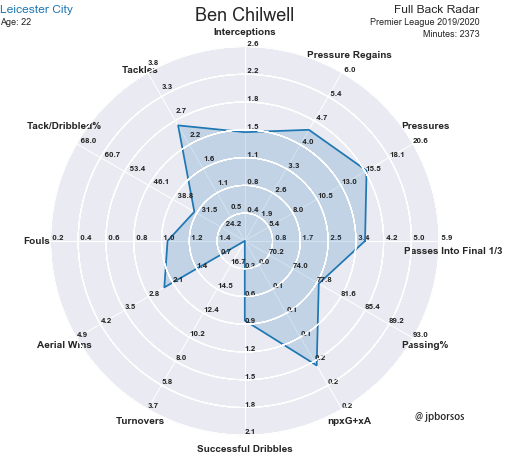

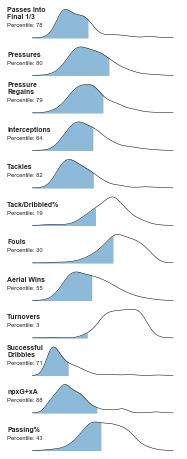

In [788]:
def FB(player,league):
    FBRadar(player,league)
    FBDistributionPlot(player,league)
    CombineImages(player,league)
    
FB('Ben Chilwell','PL')

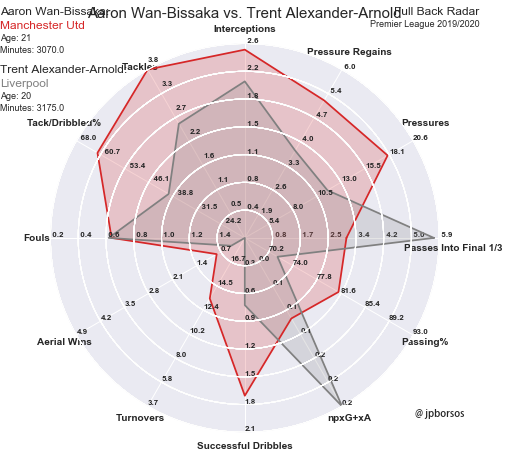

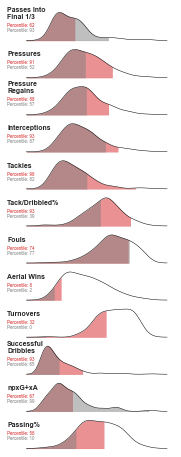

In [781]:
def FBComp(player1,player2,league):
    FBCompRadar(player1,player2,league)
    FBCompDistributionPlot(player1,player2,league)
    CombineCompImages(player1,player2,league)
    
FBComp('Aaron Wan-Bissaka','Trent Alexander-Arnold','PL')

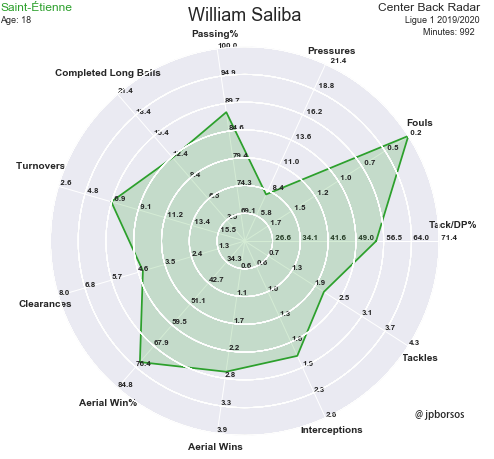

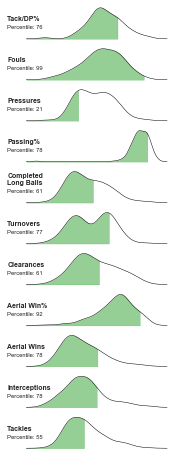

In [773]:
def CB(player,league):
    CBRadar(player,league)
    CBDistributionPlot(player,league)
    CombineImages(player,league)
    
CB('William Saliba','L1')

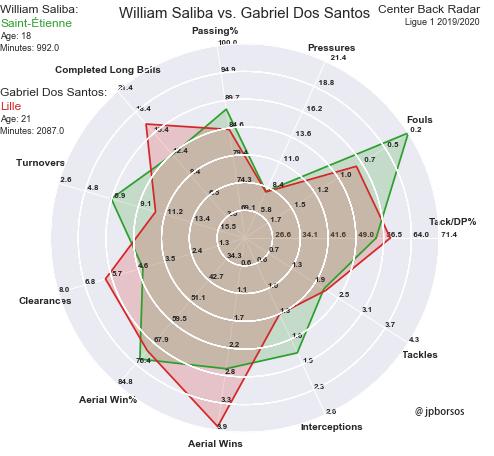

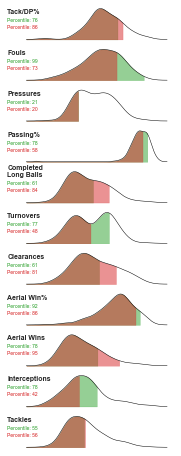

In [774]:
def CBComp(player1,player2,league):
    CBCompRadar(player1,player2,league)
    CBCompDistributionPlot(player1,player2,league)
    CombineCompImages(player1,player2,league)
    
CBComp('William Saliba','Gabriel Dos Santos','L1')

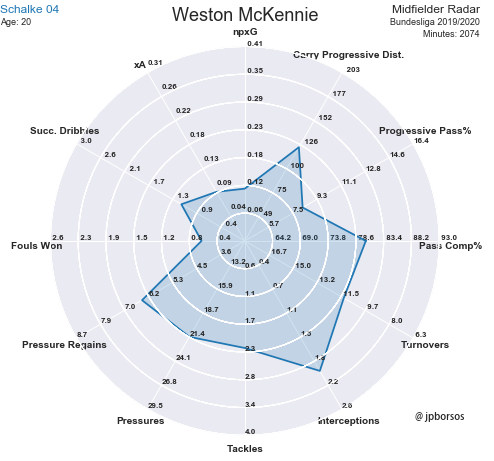

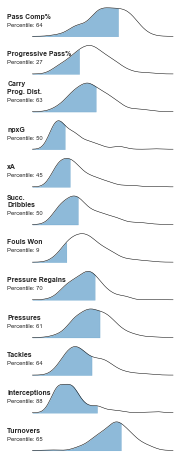

In [786]:
def MF(player,league):
    MidfieldRadar(player,league)
    MFDistributionPlot(player,league)
    CombineImages(player,league)
    
MF('Weston McKennie','Bu')

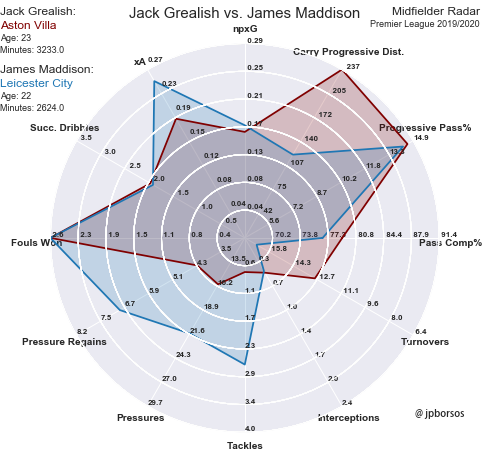

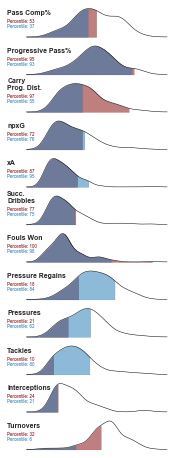

In [784]:
def MFComp(player1,player2,league):
    MFCompRadar(player1,player2,league)
    MFCompDistributionPlot(player1,player2,league)
    CombineCompImages(player1,player2,league)
    
MFComp('Jack Grealish','James Maddison','PL')

In [767]:
def AMF(player,league):
    AMFWingerRadar(player,league)
    AMFDistributionPlot(player,league)
    CombineImages(player,league)

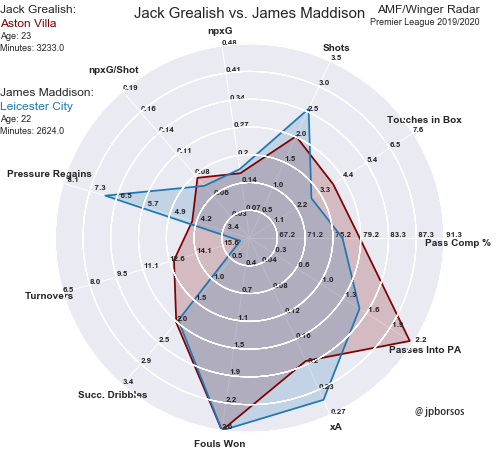

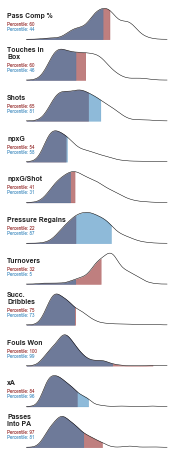

In [783]:
def AMFComp(player1,player2,league):
    AMFWingerCompRadar(player1,player2,league)
    AMFCompDistributionPlot(player1,player2,league)
    CombineCompImages(player1,player2,league)
    
AMFComp('Jack Grealish','James Maddison','PL')

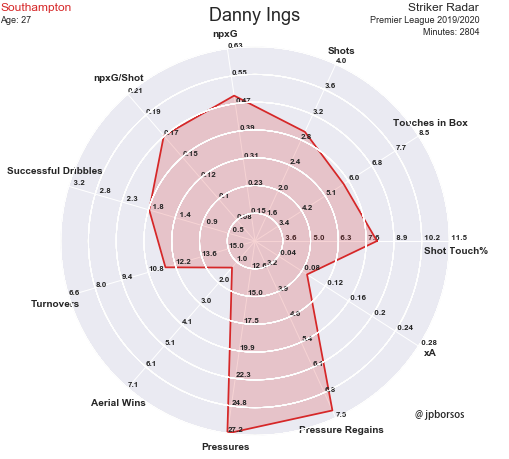

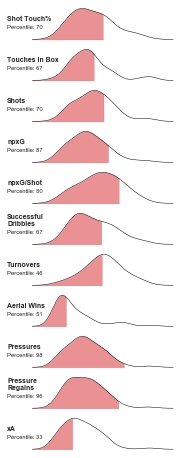

In [777]:
def ST(player,league):
    StrikerRadar(player,league)
    STDistributionPlot(player,league)
    CombineImages(player,league)
    
ST('Danny Ings','PL')

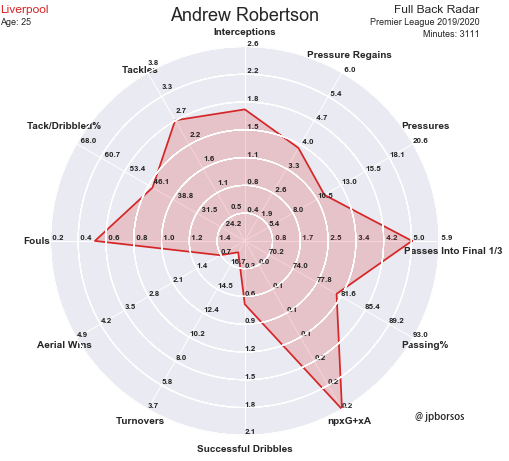

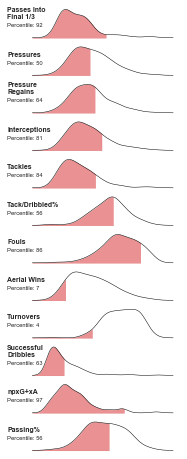

In [761]:
FB('Andrew Robertson','PL')